In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import os

warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.shape

(9134, 24)

In [8]:
#1. Get the numerical variables from our dataset.

In [7]:
numerical = data.select_dtypes(exclude = object)
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


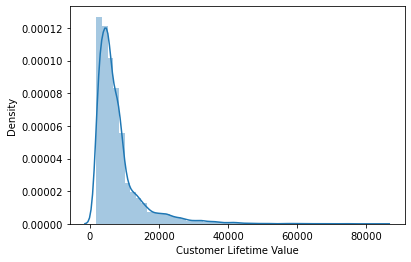

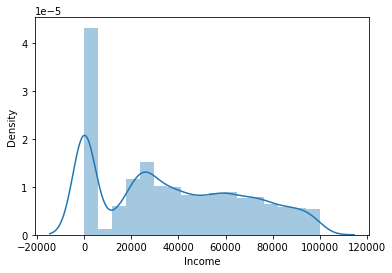

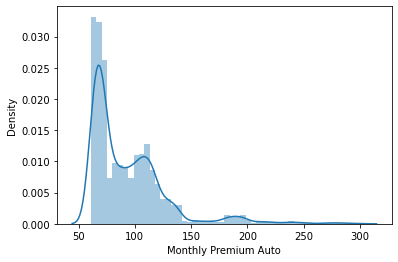

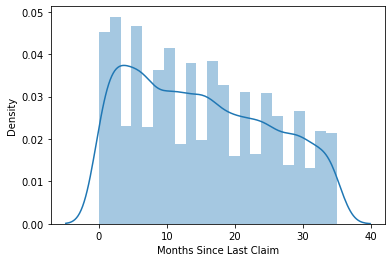

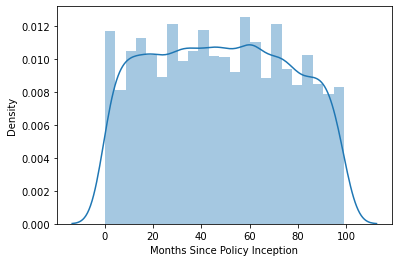

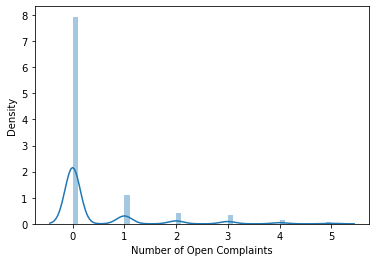

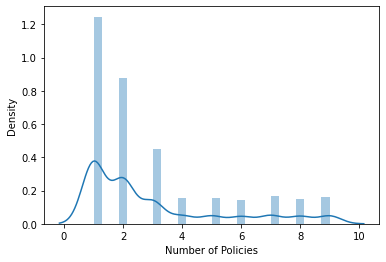

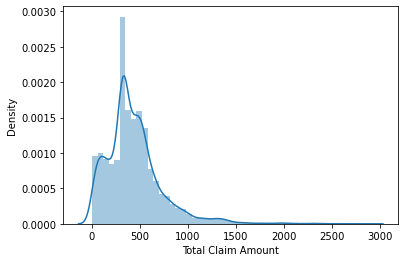

In [19]:
for column in numerical:
    sns.distplot(numerical[column])
    plt.show()

Only feature Month Since Policy Inception is a normal distrbution

3.Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


            sqrt
0      52.569186
1      83.543617
2     113.522824
3      87.440619
4      53.044251
...          ...
9129  152.990156
9130   55.646305
9131   90.354250
9132   86.743544
9133   51.106133

[9134 rows x 1 columns]


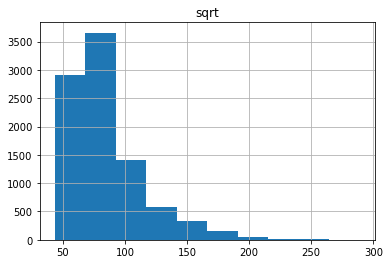

            sqrt
0     237.221416
1       0.000000
2     220.832516
3       0.000000
4     209.370485
...          ...
9129  268.218195
9130  146.982992
9131    0.000000
9132  148.124947
9133    0.000000

[9134 rows x 1 columns]


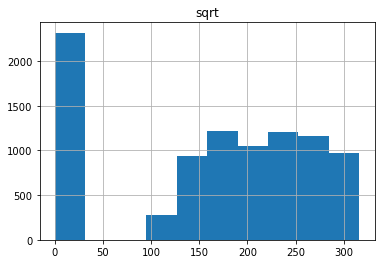

           sqrt
0      8.306624
1      9.695360
2     10.392305
3     10.295630
4      8.544004
...         ...
9129   8.544004
9130   8.888194
9131   9.219544
9132   9.797959
9133   8.774964

[9134 rows x 1 columns]


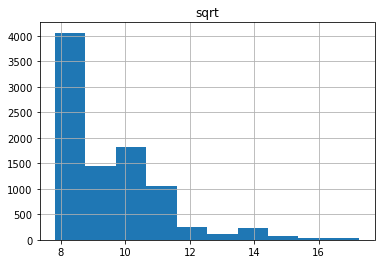

          sqrt
0     5.656854
1     3.605551
2     4.242641
3     4.242641
4     3.464102
...        ...
9129  4.242641
9130  3.741657
9131  3.000000
9132  5.830952
9133  1.732051

[9134 rows x 1 columns]


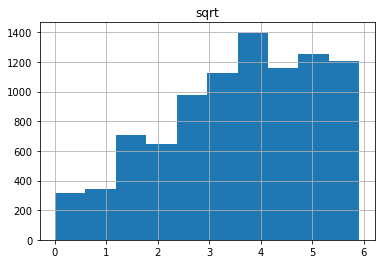

          sqrt
0     2.236068
1     6.480741
2     6.164414
3     8.062258
4     6.633250
...        ...
9129  9.433981
9130  5.291503
9131  6.082763
9132  1.732051
9133  9.486833

[9134 rows x 1 columns]


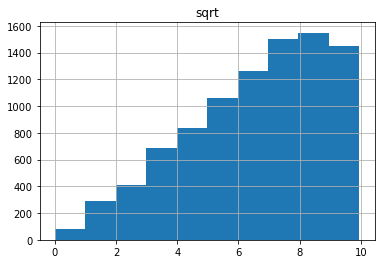

          sqrt
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
...        ...
9129  0.000000
9130  0.000000
9131  1.732051
9132  0.000000
9133  0.000000

[9134 rows x 1 columns]


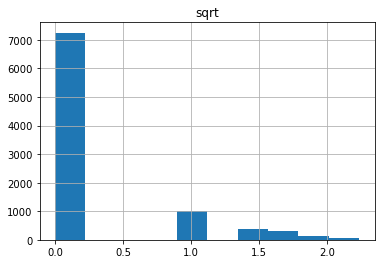

          sqrt
0     1.000000
1     2.828427
2     1.414214
3     2.645751
4     1.000000
...        ...
9129  1.414214
9130  1.000000
9131  1.414214
9132  1.732051
9133  1.000000

[9134 rows x 1 columns]


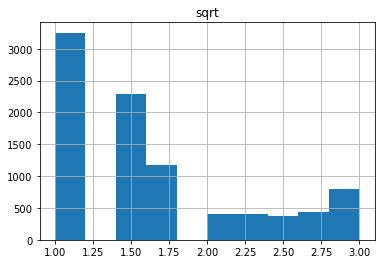

           sqrt
0     19.616604
1     33.637255
2     23.800677
3     23.019152
4     11.752909
...         ...
9129  14.079587
9130  19.473058
9131  28.120899
9132  26.290683
9133  19.224984

[9134 rows x 1 columns]


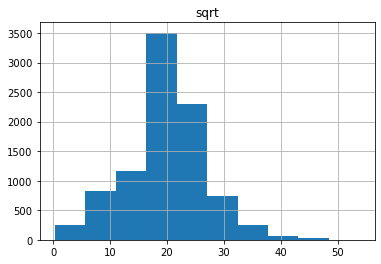

In [10]:
for col in numerical:
    data_tr= data[col].transform([np.sqrt])
    print(data_tr)
    data_tr.hist()
    plt.show()

In [12]:
#create log-transformed data
data_log = np.log(numerical)
data_log

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,-inf,0.000000,5.952753
1,8.850738,-inf,4.543295,2.564949,3.737670,-inf,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,-inf,0.693147,6.339428
3,8.941920,-inf,4.663439,2.890372,4.174387,-inf,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,-inf,0.000000,4.928202
...,...,...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,-inf,0.693147,5.289452
9130,8.038031,9.980634,4.369448,2.639057,3.332205,-inf,0.000000,5.938064
9131,9.007476,-inf,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026
9132,8.925912,9.996112,4.564348,3.526361,1.098612,-inf,1.098612,6.538429


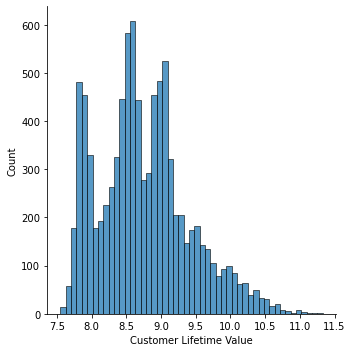

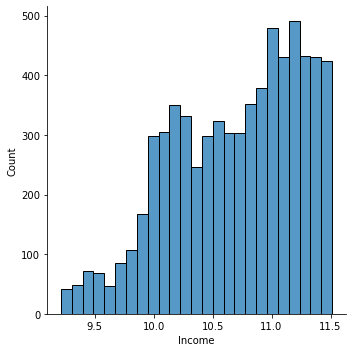

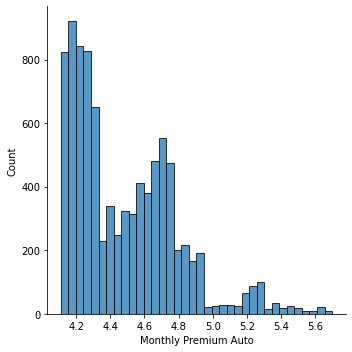

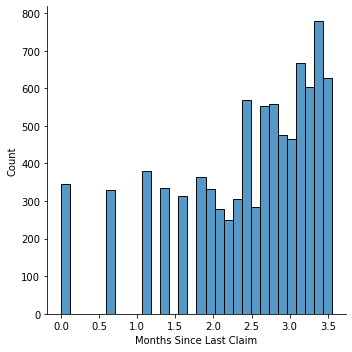

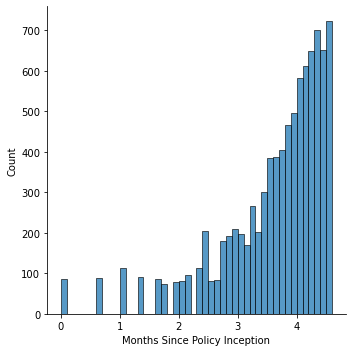

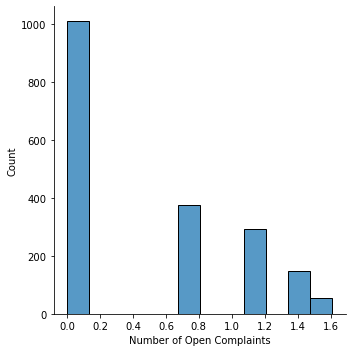

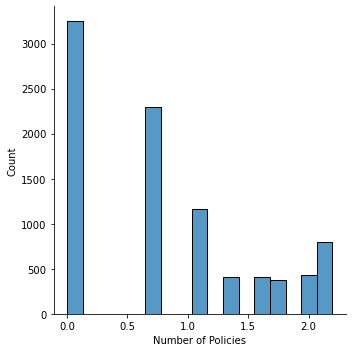

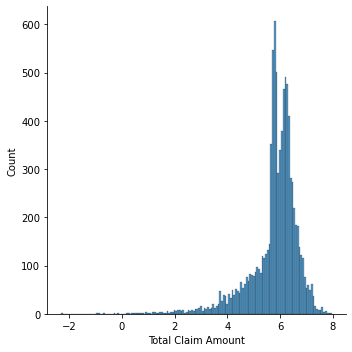

In [20]:
for column in data_log:
    sns.displot(data_log[column])
    plt.show()
